In [30]:
### Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
### Step 2: Load and Explore Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [5]:
# Count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [38]:
### Step 3: Preprocess Data
# Reshape data to fit CNN (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [37]:
# Normalize pixel values to range [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [35]:

# Convert labels to one-hot encoding (Ensure it's applied only once)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:

# Debugging print
print("y_train shape after one-hot encoding:", y_train.shape)  # Should be (60000, 10)
print("y_test shape after one-hot encoding:", y_test.shape)    # Should be (10000, 10)

y_train shape after one-hot encoding: (60000, 10)
y_test shape after one-hot encoding: (10000, 10)


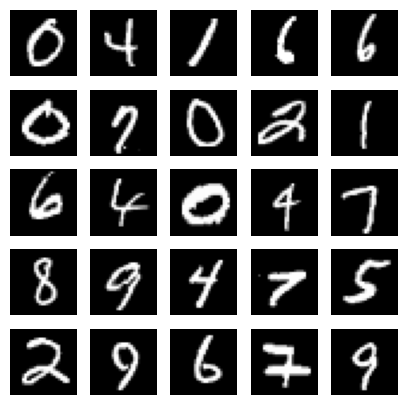

In [10]:
# Additional Visualization Step
indexes = np.random.choice(len(x_train), 25, replace=False)
images = x_train[indexes]
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
#convolayer,maxpull layer,dense

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=128)

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1116 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1109 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1120 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1110 - loss: 2.3016 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1116 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1124 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1119 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1130 - loss: 2.3011 - 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("\nTest loss:", score[0])
print("Test accuracy:", score[1])

# Print final training accuracy and loss
train_loss = history.history['loss'][-1]
train_acc = history.history['accuracy'][-1]
print("\nTraining loss:", train_loss)
print("Training accuracy:", train_acc)


46028

In [ ]:
y_predict = model.predict(x_test)
y_predict_classes = np.argmax(y_predict, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
con_mat = confusion_matrix(y_test_classes, y_predict_classes)
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False Predicted Digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()